In [39]:
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np

import scipy.stats
import urllib.request
import requests

import io
import os
import sys
import json
import geopandas as gpd
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
from shapely.geometry import Point
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [173]:
#!wget /scratch/share/mohitsharma44/cusp-hack-17
#df1 = pd.read_csv("/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb3bda47.sonyc-2017-01.csv")

bce = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb2a1bce.sonyc-2017-01.csv')
c22e = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb4cc22e.sonyc-2017-01.csv')
af7 = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb0d8af7.sonyc-2017-01.csv')
da47 = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb3bda47.sonyc-2017-01.csv')
d073b = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827ebad073b.sonyc-2017-01.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,20,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [232]:
bce.columns

Index(['Unnamed: 0', 'AP', 'RX_packets', 'TX_packets', 'branch', 'commit_date',
       'commits', 'cpu_cur_freq', 'cpu_load_1', 'cpu_load_15', 'cpu_load_5',
       'cpu_max_freq', 'cpu_min_freq', 'cpu_temp', 'disk_part', 'eth0_mac',
       'fqdn', 'ingestion_server', 'laeq', 'lceq', 'level_time', 'lzeq',
       'mem_available', 'mem_percent', 'mem_total', 'mem_used', 'music_usage',
       'nodeid', 'position', 'root_usage', 'running_proc', 'time', 'tmp_usage',
       'tun0_ip', 'usb_dev', 'wlan0_ip', 'wlan0_mac'],
      dtype='object')

In [217]:
def todatetime(df):
    df['time'] = pd.to_datetime(df.time)

In [218]:
todatetime(bce)
todatetime(c22e)
todatetime(af7)
todatetime(da47)
todatetime(d073b)

In [88]:
def plotdef(df):
    ax = pl.figure(figsize=(10,3)).add_subplot(111)
    ax.plot(df1['time'], bce['cpu_load_15'], alpha = 0.6, label = 'bce
    ax.set_ylabel("data")
    ax.set_xlabel("time");

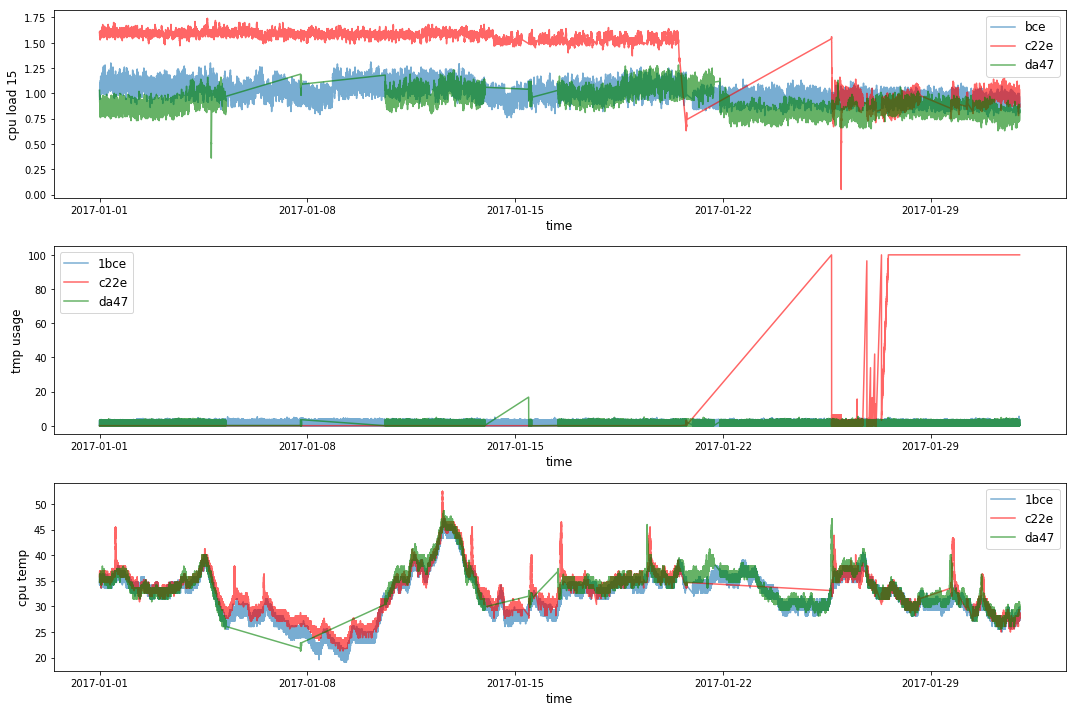

In [261]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(311)
ax1.plot(bce['time'], bce['cpu_load_15'], alpha = 0.6, label = 'bce')
ax1.plot(c22e['time'], c22e['cpu_load_15'], 'r', alpha = 0.6, label = 'c22e')
ax1.plot(da47['time'], da47['cpu_load_15'], 'g', alpha = 0.6, label = 'da47')
#ax1.plot(d073b['time'], d073b['cpu_load_15'], 'm', alpha = 0.6, label = '073b')
ax1.set_xlabel("time", fontsize = 12)
ax1.set_ylabel("cpu load 15", fontsize = 12)
ax1.legend(fontsize = 12)

ax2 = pl.subplot(312)
ax2.plot(bce['time'], bce['tmp_usage'], alpha = 0.6, label = '1bce')
ax2.plot(c22e['time'], c22e['tmp_usage'], 'r', alpha = 0.6, label = 'c22e')
ax2.plot(da47['time'], da47['tmp_usage'], 'g', alpha = 0.6, label = 'da47')
#ax2.plot(d073b['time'], d073b['tmp_usage'], 'm', alpha = 0.6, label = '073b')
ax2.set_xlabel("time", fontsize = 12)
ax2.set_ylabel("tmp usage", fontsize = 12)
ax2.legend(fontsize = 12)

ax3 = pl.subplot(313)
ax3.plot(bce['time'], bce['cpu_temp'], alpha = 0.6, label = '1bce')
ax3.plot(c22e['time'], c22e['cpu_temp'], 'r', alpha = 0.6, label = 'c22e')
ax3.plot(da47['time'], da47['cpu_temp'], 'g', alpha = 0.6, label = 'da47')
#ax3.plot(d073b['time'], d073b['cpu_temp'], 'm', alpha = 0.6, label = '073b')
ax3.set_xlabel("time", fontsize = 12)
ax3.set_ylabel("cpu temp", fontsize = 12)
ax3.legend(fontsize = 12)

pl.tight_layout()

In [234]:
bce['time'][0]

Timestamp('2017-01-01 00:00:03.213502')

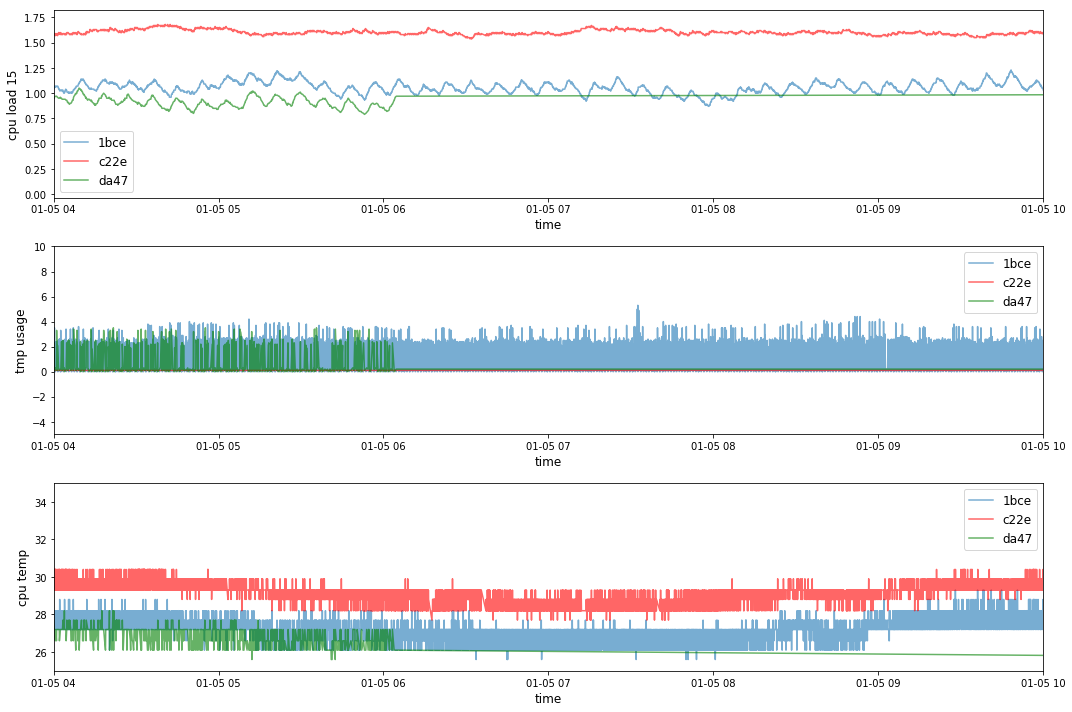

In [262]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(311)
ax1.plot(bce['time'], bce['cpu_load_15'], alpha = 0.6, label = '1bce')
ax1.plot(c22e['time'], c22e['cpu_load_15'], 'r', alpha = 0.6, label = 'c22e')
ax1.plot(da47['time'], da47['cpu_load_15'], 'g', alpha = 0.6, label = 'da47')
#ax1.plot(d073b['time'], d073b['cpu_load_15'], 'm', alpha = 0.6, label = '073b')
ax1.set_xlabel("time", fontsize = 12)
ax1.set_ylabel("cpu load 15", fontsize = 12)
plt.xlim('2017-01-05 04:00:00', '2017-01-05 10:00:00')
ax1.legend(fontsize = 12)

ax2 = pl.subplot(312)
ax2.plot(bce['time'], bce['tmp_usage'], alpha = 0.6, label = '1bce')
ax2.plot(c22e['time'], c22e['tmp_usage'], 'r', alpha = 0.6, label = 'c22e')
ax2.plot(da47['time'], da47['tmp_usage'], 'g', alpha = 0.6, label = 'da47')
#ax2.plot(d073b['time'], d073b['tmp_usage'], 'm', alpha = 0.6, label = '073b')
ax2.set_xlabel("time", fontsize = 12)
ax2.set_ylabel("tmp usage", fontsize = 12)
plt.xlim('2017-01-05 04:00:00', '2017-01-05 10:00:00')
plt.ylim(-5, 10)
ax2.legend(fontsize = 12)

ax3 = pl.subplot(313)
ax3.plot(bce['time'], bce['cpu_temp'], alpha = 0.6, label = '1bce')
ax3.plot(c22e['time'], c22e['cpu_temp'], 'r', alpha = 0.6, label = 'c22e')
ax3.plot(da47['time'], da47['cpu_temp'], 'g', alpha = 0.6, label = 'da47')
#ax3.plot(d073b['time'], d073b['cpu_temp'], 'm', alpha = 0.6, label = '073b')
ax3.set_xlabel("time", fontsize = 12)
ax3.set_ylabel("cpu temp", fontsize = 12)
plt.xlim('2017-01-05 04:00:00', '2017-01-05 10:00:00')
plt.ylim(25, 35)
ax3.legend(fontsize = 12)
pl.tight_layout()


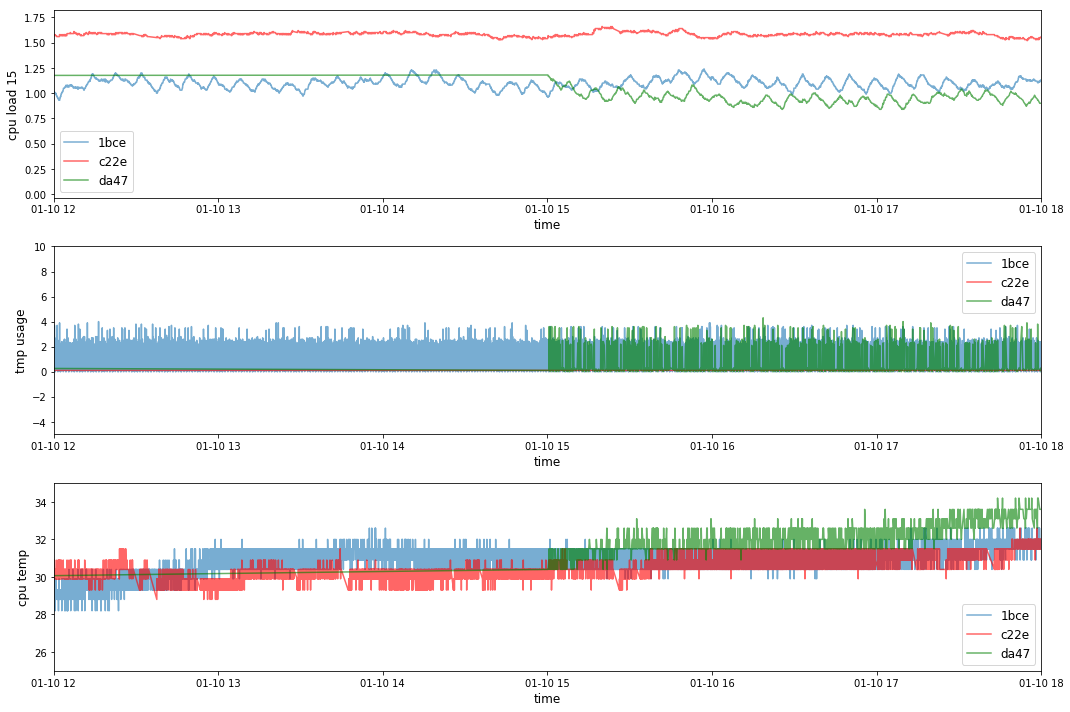

In [263]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(311)
ax1.plot(bce['time'], bce['cpu_load_15'], alpha = 0.6, label = '1bce')
ax1.plot(c22e['time'], c22e['cpu_load_15'], 'r', alpha = 0.6, label = 'c22e')
ax1.plot(da47['time'], da47['cpu_load_15'], 'g', alpha = 0.6, label = 'da47')
#ax1.plot(d073b['time'], d073b['cpu_load_15'], 'm', alpha = 0.6, label = '073b')
ax1.set_xlabel("time", fontsize = 12)
ax1.set_ylabel("cpu load 15", fontsize = 12)
plt.xlim('2017-01-10 12:00:00', '2017-01-10 18:00:00')
ax1.legend(fontsize = 12)

ax2 = pl.subplot(312)
ax2.plot(bce['time'], bce['tmp_usage'], alpha = 0.6, label = '1bce')
ax2.plot(c22e['time'], c22e['tmp_usage'], 'r', alpha = 0.6, label = 'c22e')
ax2.plot(da47['time'], da47['tmp_usage'], 'g', alpha = 0.6, label = 'da47')
#ax2.plot(d073b['time'], d073b['tmp_usage'], 'm', alpha = 0.6, label = '073b')
ax2.set_xlabel("time", fontsize = 12)
ax2.set_ylabel("tmp usage", fontsize = 12)
plt.xlim('2017-01-10 12:00:00', '2017-01-10 18:00:00')
plt.ylim(-5, 10)
ax2.legend(fontsize = 12)

ax3 = pl.subplot(313)
ax3.plot(bce['time'], bce['cpu_temp'], alpha = 0.6, label = '1bce')
ax3.plot(c22e['time'], c22e['cpu_temp'], 'r', alpha = 0.6, label = 'c22e')
ax3.plot(da47['time'], da47['cpu_temp'], 'g', alpha = 0.6, label = 'da47')
#ax3.plot(d073b['time'], d073b['cpu_temp'], 'm', alpha = 0.6, label = '073b')
ax3.set_xlabel("time", fontsize = 12)
ax3.set_ylabel("cpu temp", fontsize = 12)
plt.xlim('2017-01-10 12:00:00', '2017-01-10 18:00:00')
plt.ylim(25, 35)
ax3.legend(fontsize = 12)
pl.tight_layout()

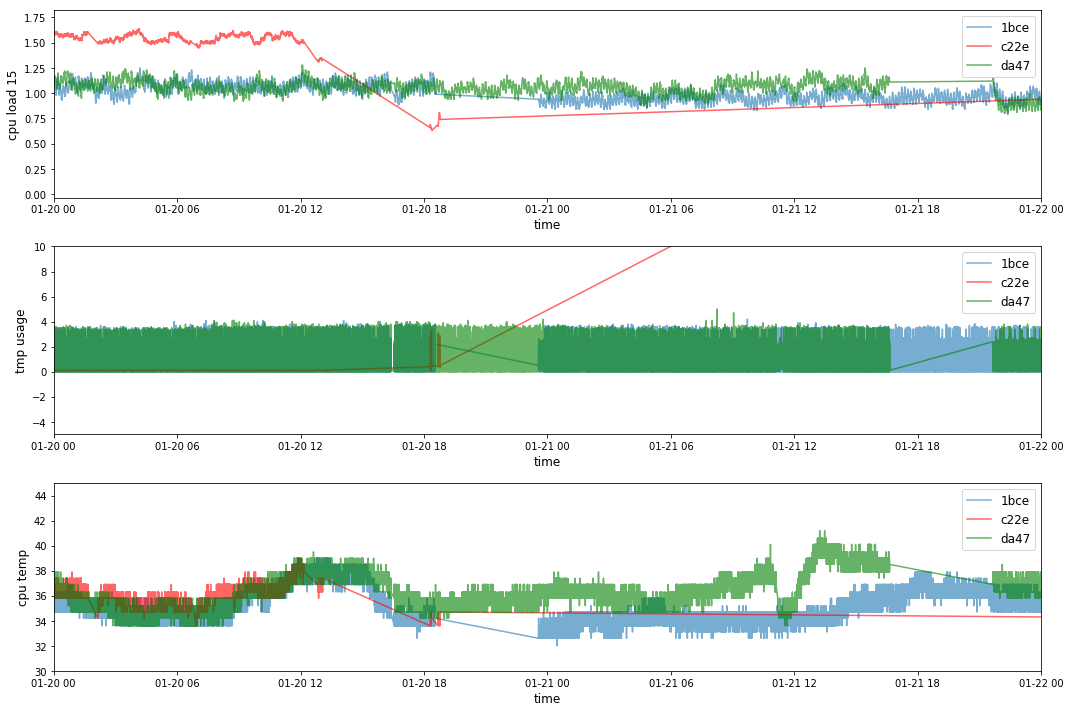

In [264]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(311)
ax1.plot(bce['time'], bce['cpu_load_15'], alpha = 0.6, label = '1bce')
ax1.plot(c22e['time'], c22e['cpu_load_15'], 'r', alpha = 0.6, label = 'c22e')
ax1.plot(da47['time'], da47['cpu_load_15'], 'g', alpha = 0.6, label = 'da47')
#ax1.plot(d073b['time'], d073b['cpu_load_15'], 'm', alpha = 0.6, label = '073b')
ax1.set_xlabel("time", fontsize = 12)
ax1.set_ylabel("cpu load 15", fontsize = 12)
plt.xlim('2017-01-20 00:00:00', '2017-01-22 00:00:00')
ax1.legend(fontsize = 12)

ax2 = pl.subplot(312)
ax2.plot(bce['time'], bce['tmp_usage'], alpha = 0.6, label = '1bce')
ax2.plot(c22e['time'], c22e['tmp_usage'], 'r', alpha = 0.6, label = 'c22e')
ax2.plot(da47['time'], da47['tmp_usage'], 'g', alpha = 0.6, label = 'da47')
#ax2.plot(d073b['time'], d073b['tmp_usage'], 'm', alpha = 0.6, label = '073b')
ax2.set_xlabel("time", fontsize = 12)
ax2.set_ylabel("tmp usage", fontsize = 12)
plt.xlim('2017-01-20 00:00:00', '2017-01-22 00:00:00')
plt.ylim(-5, 10)
ax2.legend(fontsize = 12)

ax3 = pl.subplot(313)
ax3.plot(bce['time'], bce['cpu_temp'], alpha = 0.6, label = '1bce')
ax3.plot(c22e['time'], c22e['cpu_temp'], 'r', alpha = 0.6, label = 'c22e')
ax3.plot(da47['time'], da47['cpu_temp'], 'g', alpha = 0.6, label = 'da47')
#ax3.plot(d073b['time'], d073b['cpu_temp'], 'm', alpha = 0.6, label = '073b')
ax3.set_xlabel("time", fontsize = 12)
ax3.set_ylabel("cpu temp", fontsize = 12)
plt.xlim('2017-01-20 00:00:00', '2017-01-22 00:00:00')
plt.ylim(30, 45)
ax3.legend(fontsize = 12)
pl.tight_layout()

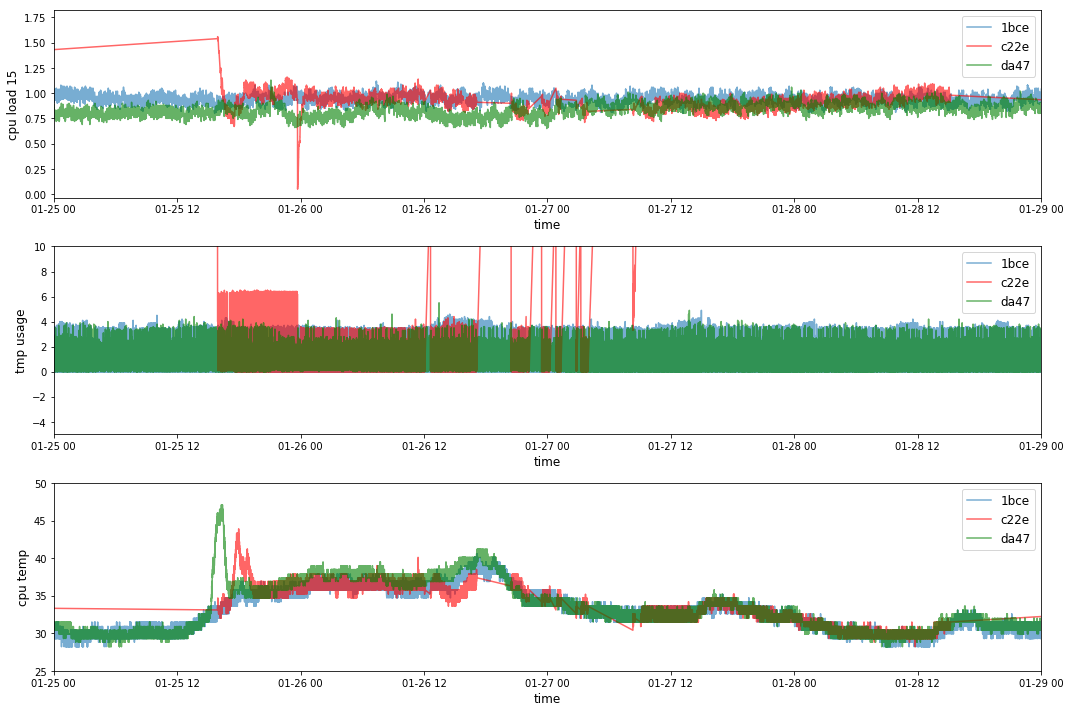

In [266]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(311)
ax1.plot(bce['time'], bce['cpu_load_15'], alpha = 0.6, label = '1bce')
ax1.plot(c22e['time'], c22e['cpu_load_15'], 'r', alpha = 0.6, label = 'c22e')
ax1.plot(da47['time'], da47['cpu_load_15'], 'g', alpha = 0.6, label = 'da47')
#ax1.plot(d073b['time'], d073b['cpu_load_15'], 'm', alpha = 0.6, label = '073b')
ax1.set_xlabel("time", fontsize = 12)
ax1.set_ylabel("cpu load 15", fontsize = 12)
plt.xlim('2017-01-25 00:00:00', '2017-01-29 00:00:00')
ax1.legend(fontsize = 12)

ax2 = pl.subplot(312)
ax2.plot(bce['time'], bce['tmp_usage'], alpha = 0.6, label = '1bce')
ax2.plot(c22e['time'], c22e['tmp_usage'], 'r', alpha = 0.6, label = 'c22e')
ax2.plot(da47['time'], da47['tmp_usage'], 'g', alpha = 0.6, label = 'da47')
#ax2.plot(d073b['time'], d073b['tmp_usage'], 'm', alpha = 0.6, label = '073b')
ax2.set_xlabel("time", fontsize = 12)
ax2.set_ylabel("tmp usage", fontsize = 12)
plt.xlim('2017-01-25 00:00:00', '2017-01-29 00:00:00')
plt.ylim(-5, 10)
ax2.legend(fontsize = 12)

ax3 = pl.subplot(313)
ax3.plot(bce['time'], bce['cpu_temp'], alpha = 0.6, label = '1bce')
ax3.plot(c22e['time'], c22e['cpu_temp'], 'r', alpha = 0.6, label = 'c22e')
ax3.plot(da47['time'], da47['cpu_temp'], 'g', alpha = 0.6, label = 'da47')
#ax3.plot(d073b['time'], d073b['cpu_temp'], 'm', alpha = 0.6, label = '073b')
ax3.set_xlabel("time", fontsize = 12)
ax3.set_ylabel("cpu temp", fontsize = 12)
plt.xlim('2017-01-25 00:00:00', '2017-01-29 00:00:00')
plt.ylim(25, 50)
ax3.legend(fontsize = 12)
pl.tight_layout()